# Time Series Analysis: Tutorial 9

## Import packages

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('text', usetex=True)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.linear_model import LinearRegression
from statistics import mean

## Exercise 2: Difference-stationary models

i. Load the "GNPperCapita.dta" data, transform the time series to first differences.

ii. Is the transformed time series stationary?

iii. Inspect the serial dependency pattern of the transformed time series. How can you model it? 

iv. Estimate the model and check whether it is appropriate.

          time    GNP      lnGNP    relGNP
0   1947-01-01  12447   9.429235       NaN
1   1947-04-01  12375   9.423433 -0.005801
2   1947-07-01  12309   9.418086 -0.005347
3   1947-10-01  12440   9.428673  0.010587
4   1948-01-01  12589   9.440578  0.011906
..         ...    ...        ...       ...
250 2009-07-01  42278  10.652022  0.004171
251 2009-10-01  42688  10.661674  0.009651
252 2010-01-01  43067  10.670512  0.008839
253 2010-04-01  43176  10.673040  0.002528
254 2010-07-01  43323  10.676439  0.003399

[255 rows x 4 columns]


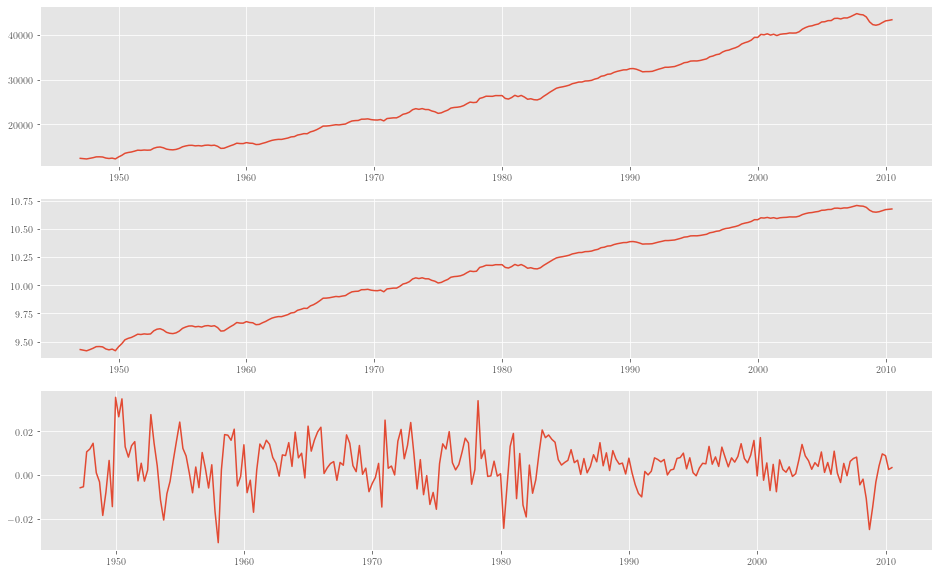

In [25]:
# Load the data
series=pd.read_stata('C:/Users/MS/Documents/TU/Teaching/TSA/B-Computations/GNPperCapita.dta')
# Calculate first differences
series['relGNP'] = series.lnGNP.diff()

# inspect the data
print(series)

# Plot the series
fig, ax=plt.subplots(3,1,figsize=(16,10))
ax[0].plot(series['time'],series['GNP'])
ax[1].plot(series['time'],series['lnGNP'])
ax[2].plot(series['time'],series['relGNP'])

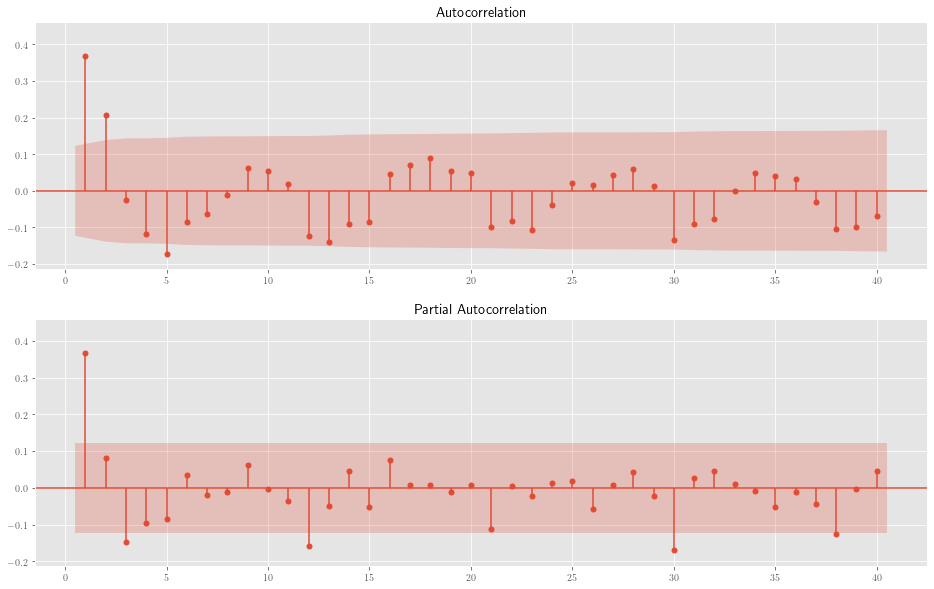

In [5]:
# Now we look at the last time series, i.e. the first differences of the logarithm 
# of the real GNP in the U.S.
# Is this data stationary? 
# Let's investigate on the serial dependency pattern:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series['relGNP'].values[1:], lags=40, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series['relGNP'].values[1:], lags=40, ax=ax2, alpha=0.05, zero=False, auto_ylims=True, method = 'ywm')

Comments: 

 - Correlation pattern appear to be stationary
 - AR(3) could also suit this data

In [8]:
# Estimate the AR(3) 
# Use the ARIMA command, the AR(3) is the ARIMA(3,0,0)
AR3 =ARIMA(series['relGNP'],order=(3,0,0))
AR3_fit = AR3.fit()
print(AR3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 relGNP   No. Observations:                  255
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 245.001
Date:                Mon, 23 Jan 2023   AIC                           -480.002
Time:                        20:38:04   BIC                           -462.296
Sample:                             0   HQIC                          -472.880
                                - 255                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0486      0.009      5.324      0.000       0.031       0.067
ar.L1          0.3506      0.050      6.986      0.000       0.252       0.449
ar.L2          0.1345      0.055      2.443      0.0

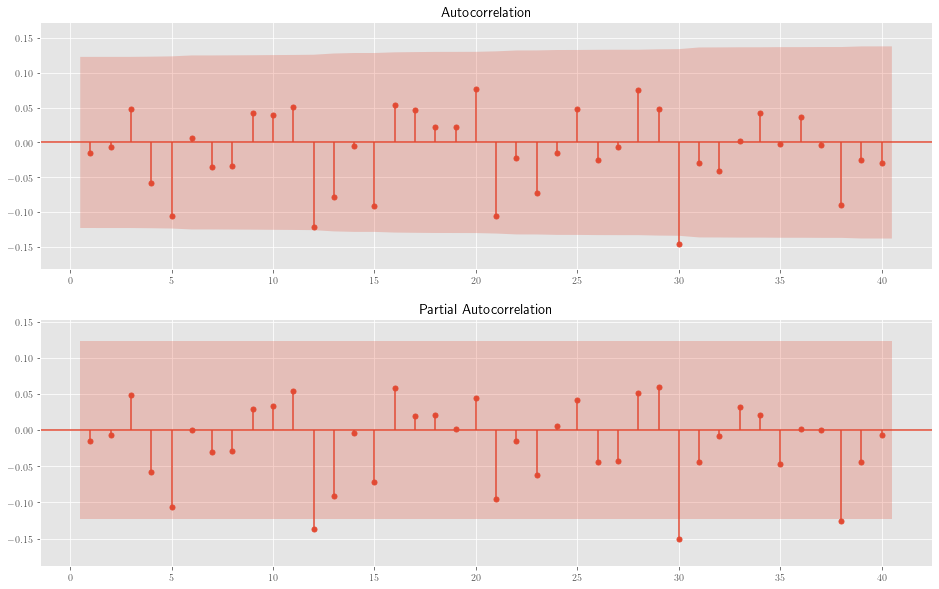

In [12]:
# ACF of the residuals
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(AR3_fit.resid.values[1:], lags=40, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(AR3_fit.resid.values[1:], lags=40, ax=ax2, alpha=0.05, zero=False, auto_ylims=True, method = 'ywm')

Comment:

- No correlation left
- I.e. AR(3) is "reasonable" model
- The resulting, estimated model writes: $y_t=0.0486-0.3506y_{t-1}-0.1345y_{t-2}+0.1492y_{t-3}$

## Exercise 3: Programming

a.	Load the "parts_availability.dta" data. The data comes from a series provided by a large U.S. corporation. There are 90 weekly observations showing the percent of the time that parts for an industrial product are available when needed. 

b.	Identification: Which model would you chose and why?

c.	Estimation: Estimate your model. 

d.	Diagnostic checking: Is the selected model a statistically adequate representation of the time series?

In [26]:
# Load the parts availability data
series=pd.read_stata('C:/Users/MS/Documents/TU/Teaching/TSA/B-Computations/parts_availability.dta')
# inspect the data
print(series)

    time  parts_availability
0    1.0           80.400002
1    2.0           83.900002
2    3.0           82.599998
3    4.0           77.900002
4    5.0           83.500000
..   ...                 ...
85  86.0           84.500000
86  87.0           85.599998
87  88.0           84.699997
88  89.0           79.900002
89  90.0           88.900002

[90 rows x 2 columns]


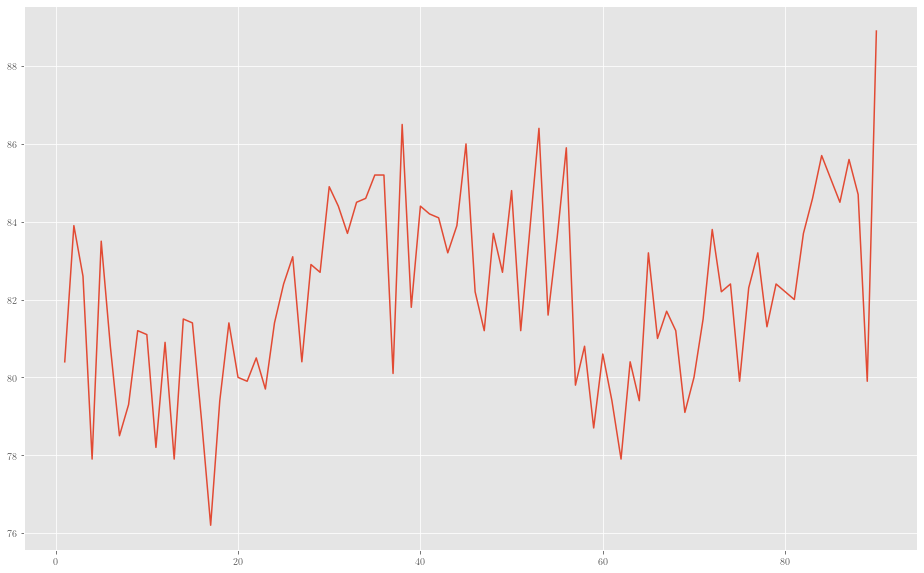

In [27]:
# Plot the time series
fig, ax=plt.subplots(figsize=(16,10))
ax.plot(series['time'],series['parts_availability'])

Questions:

- Is this time series stationary?
- Which model could suite the data?

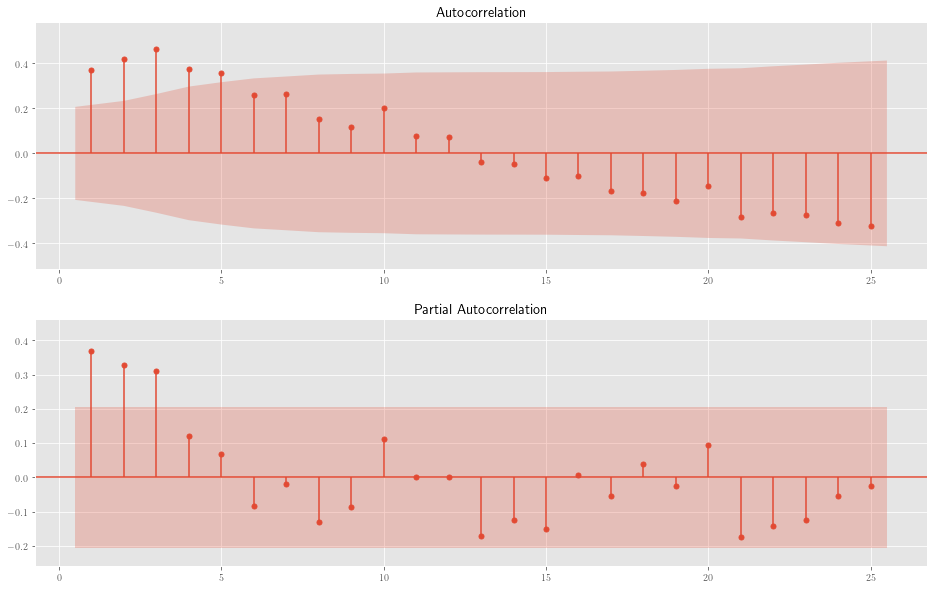

In [28]:
# ACF of the "parts availability" time series 
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series['parts_availability'], lags=25, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series['parts_availability'], lags=25, ax=ax2, alpha=0.05, zero=False, auto_ylims=True, method = 'ywm')

Comments:

- May be not stationary (ACF does not eventually fade out)
- We could try to fit a deterministic trend to the data and check, whether the residuals can be estimated by an ARMA(p,q) model.

In [29]:
# Estimate the trend, assuming that it is linear
# Simple estimation by OLS
result = smm.ols(formula="parts_availability ~ time", data=series).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     parts_availability   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     9.307
Date:                Mon, 06 Feb 2023   Prob (F-statistic):            0.00302
Time:                        20:39:00   Log-Likelihood:                -200.76
No. Observations:                  90   AIC:                             405.5
Df Residuals:                      88   BIC:                             410.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8385      0.484    166.977      0.0

Comment:
 
- The estimated slope coefficient is significant
- The estimated trendmodel writes: $\hat{y}_t=80.838+0.028*t+\hat{u}_t$
- Is this a suitable model?

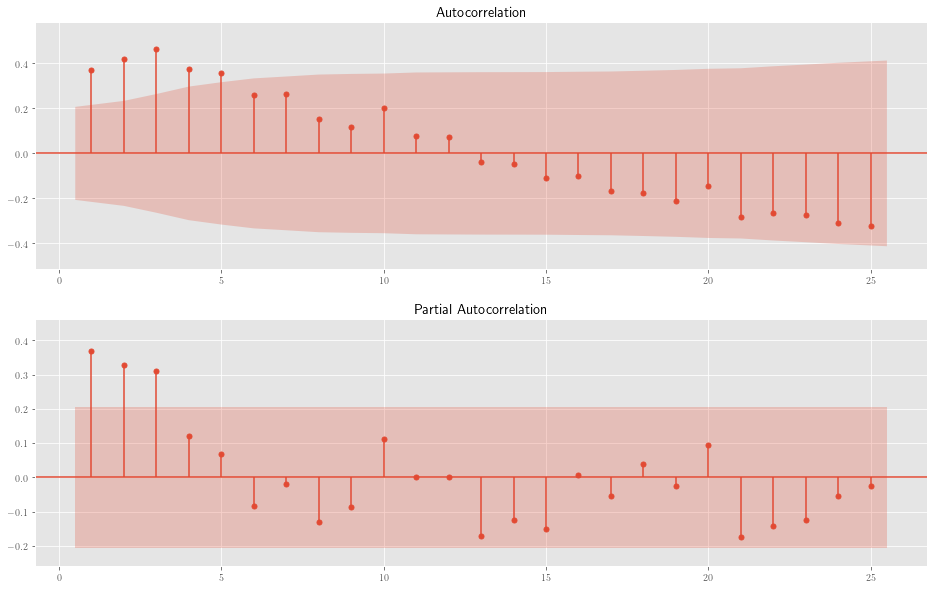

In [30]:
# ACF of the residuals time series
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series['parts_availability'], lags=25, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series['parts_availability'], lags=25, ax=ax2, alpha=0.05, zero=False, auto_ylims=True, method = 'ywm')

Comment:
    
- Again, correlation does not fade out eventually at high lags.
- Maybe TS model is not suitable

In [35]:
# Difference the series
series['relParts'] = series.parts_availability.diff()
# Inspect the new data
print(series)
# calculate the mean
print(np.nanmean(series['relParts']))

    time  parts_availability  relParts
0    1.0           80.400002       NaN
1    2.0           83.900002  3.500000
2    3.0           82.599998 -1.300003
3    4.0           77.900002 -4.699997
4    5.0           83.500000  5.599998
..   ...                 ...       ...
85  86.0           84.500000 -0.599998
86  87.0           85.599998  1.099998
87  88.0           84.699997 -0.900002
88  89.0           79.900002 -4.799995
89  90.0           88.900002  9.000000

[90 rows x 3 columns]
0.09550562


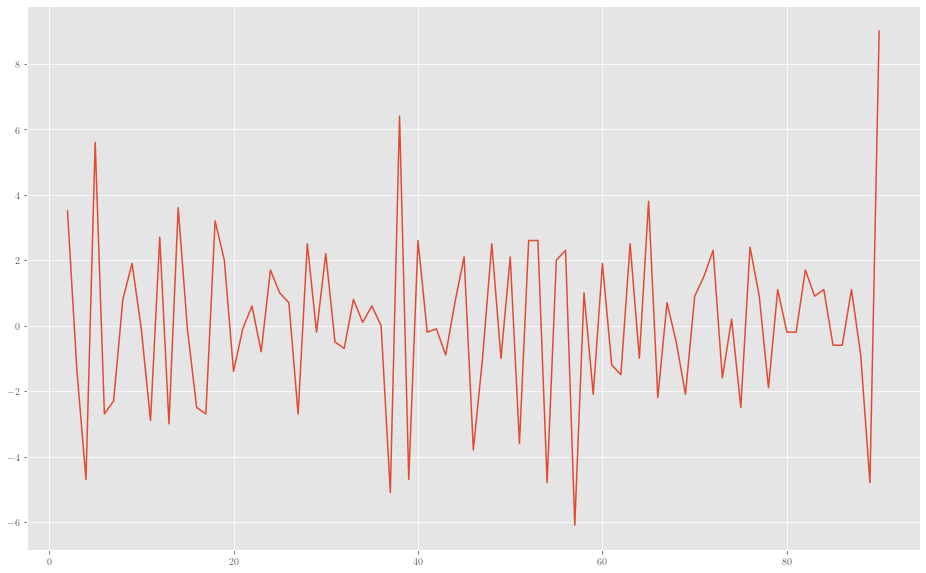

In [36]:
# Plot the differenced series
fig, ax=plt.subplots(figsize=(16,10))
ax.plot(series['time'],series['relParts'])

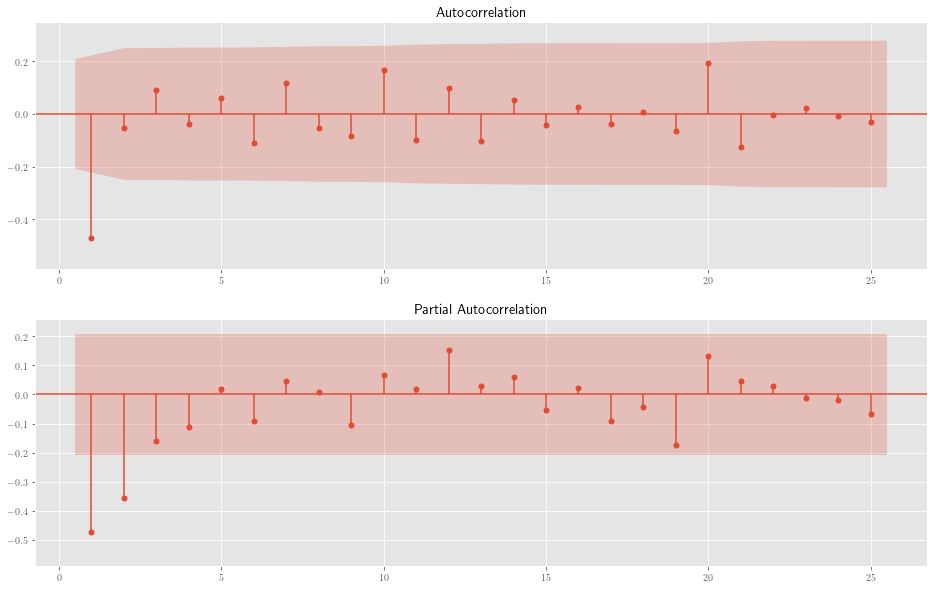

In [33]:
# ACF of the differenced time series
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series['relParts'].values[1:], lags=25, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series['relParts'].values[1:], lags=25, ax=ax2, alpha=0.05, zero=False, auto_ylims=True, method = 'ywm')

Comments:
    
- This already looks far more stationary
- The ACF has a spike at lag 1, then cuts of to zero $\rightarrow$ MA(1)
- PACF also suits MA(1) (damps out exponentially)

In [34]:
# Estimate the MA(1)
# Use the ARIMA command, the MA(1) is the ARIMA(0,0,1) 
# Note here, that we already differenced the series, i.e. we can leave the d=0
MA1 =ARIMA(series['relParts'],order=(0,0,1))
MA1_fit = MA1.fit()
print(MA1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               relParts   No. Observations:                   90
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -188.708
Date:                Mon, 06 Feb 2023   AIC                            383.416
Time:                        20:40:08   BIC                            390.916
Sample:                             0   HQIC                           386.440
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0427      0.066      0.650      0.516      -0.086       0.171
ma.L1         -0.7243      0.087     -8.319      0.000      -0.895      -0.554
sigma2         4.0325      0.687      5.869      0.0

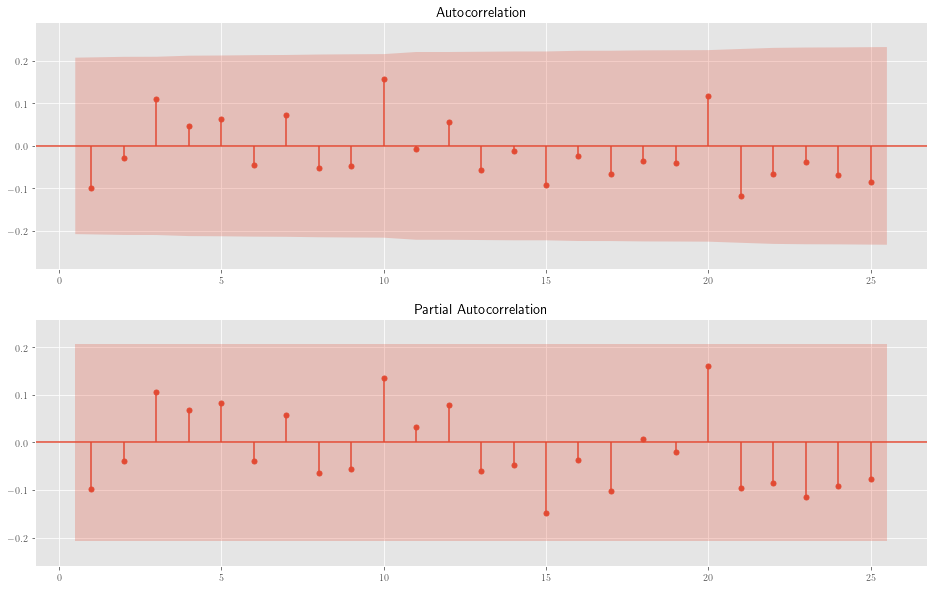

In [40]:
# ACF of the residuals of the estimated model 
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(MA1_fit.resid.values[1:], lags=25, ax=ax1, alpha=0.05, zero=False, auto_ylims=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(MA1_fit.resid.values[1:], lags=25, ax=ax2, alpha=0.05, zero=False, auto_ylims=True, method = 'ywm')

Comments:

- No more correlation
- ARIMA(0,1,1) seems to be a suitable model